In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<img src="coronvirus.webp">

In [2]:
from folium import plugins
import folium
import pycountry
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import os
from datetime import date
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()


py.init_notebook_mode(connected=True)


%matplotlib inline

## Data set collection

In [3]:
covid_19_data = pd.read_csv(
    "./novel-corona-virus-2019-dataset/covid_19_data.csv")
covid_19_data.drop("SNo", inplace=True, axis=1)
covid_19_data.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'Province',
    'Last Update': 'UpdatedOn'
},
    inplace=True)
covid_19_data['Country'].replace({'Mainland China': 'China'}, inplace=True)
covid_19_data['Date'] = covid_19_data['ObservationDate'].apply(pd.to_datetime)

### **Data set description**

In [4]:
# To get statistical analysis of numerical dimensions
covid_19_data.describe()

,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000
mean,601.195924,19.855846,226.341267
std,4896.332140,204.486922,2556.035202
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000
75%,108.000000,1.000000,11.000000
max,67800.000000,3122.000000,56927.000000


In [5]:
covid_19_data.tail()

,ObservationDate,Province,Country,UpdatedOn,Confirmed,Deaths,Recovered,Date
6717,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0,2020-03-18
6718,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,2020-03-18
6719,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,2020-03-18
6720,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,2020-03-18
6721,03/18/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0,2020-03-18


## Preprocessing of Coovid_19_Data

In [6]:
d = covid_19_data['Date'][-1:].astype('str')
year = int(d.values[0].split('-')[0])
month = int(d.values[0].split('-')[1])
day = int(d.values[0].split('-')[2].split()[0])

data_latest = covid_19_data[
    covid_19_data['Date'] >= pd.Timestamp(date(year, month, day))]
data_latest.head()

,ObservationDate,Province,Country,UpdatedOn,Confirmed,Deaths,Recovered,Date
6438,03/18/2020,Hubei,China,2020-03-18T12:13:09,67800.0,3122.0,56927.0,2020-03-18
6439,03/18/2020,NaN,Italy,2020-03-18T17:33:05,35713.0,2978.0,4025.0,2020-03-18
6440,03/18/2020,NaN,Iran,2020-03-18T12:33:02,17361.0,1135.0,5389.0,2020-03-18
6441,03/18/2020,NaN,Spain,2020-03-18T13:13:13,13910.0,623.0,1081.0,2020-03-18
6442,03/18/2020,NaN,Germany,2020-03-18T19:33:02,12327.0,28.0,105.0,2020-03-18


### **Let's select the most relavant column regarding observation.**

In [7]:
observational_data = data_latest[[
    "Country", "Confirmed", "Deaths", "Recovered"
]]
observational_data.head()

,Country,Confirmed,Deaths,Recovered
6438,China,67800.0,3122.0,56927.0
6439,Italy,35713.0,2978.0,4025.0
6440,Iran,17361.0,1135.0,5389.0
6441,Spain,13910.0,623.0,1081.0
6442,Germany,12327.0,28.0,105.0


###  **Just have a look at sorted dataframe by each category of Cases**

In [8]:
observational_data = observational_data.sort_values(by='Country', axis=0)
observational_data.head()

,Country,Confirmed,Deaths,Recovered
6607,Afghanistan,22.0,0.0,1.0
6562,Albania,59.0,2.0,0.0
6556,Algeria,74.0,7.0,12.0
6578,Andorra,39.0,0.0,1.0
6685,Antigua and Barbuda,1.0,0.0,0.0


In [9]:
# Check Observational_data type
observational_data.dtypes

Country       object
Confirmed    float64
Deaths       float64
Recovered    float64
dtype: object

### **Group by Countryname to get consolidated Count**

In [10]:
observational_data = observational_data.groupby(
    ['Country'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()

In [11]:
# To verify the groupby technique worked or not, let's have  look at Dataframe.
observational_data.head(n=60)

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,22.0,0.0,1.0
1,Albania,59.0,2.0,0.0
2,Algeria,74.0,7.0,12.0
3,Andorra,39.0,0.0,1.0
4,Antigua and Barbuda,1.0,0.0,0.0
5,Argentina,79.0,2.0,3.0
6,Armenia,84.0,0.0,1.0
7,Aruba,4.0,0.0,0.0
8,Australia,568.0,6.0,23.0
9,Austria,1646.0,4.0,9.0


**As we can see the state of Dataframe got modified after applying groupby technique. To check you can check for "China" in the country column** 

### **Overall Affected Countries on Geographical map**

In [12]:
# global_confirmed_cases = observational_data[['Country','Confirmed','Deaths','Recovered']]

# Importing the world_coordinates dataset
coordinates = pd.read_csv('./novel-corona-virus-2019-dataset/world_coordinates.csv')

# Merging the coordinates dataframe with original dataframe
pandemic_data = pd.merge(coordinates,observational_data,on='Country')
pandemic_data.head()

,Code,Country,latitude,longitude,Confirmed,Deaths,Recovered
0,AD,Andorra,42.546245,1.601554,39.0,0.0,1.0
1,AE,United Arab Emirates,23.424076,53.847818,113.0,0.0,26.0
2,AF,Afghanistan,33.939110,67.709953,22.0,0.0,1.0
3,AG,Antigua and Barbuda,17.060816,-61.796428,1.0,0.0,0.0
4,AL,Albania,41.153332,20.168331,59.0,2.0,0.0


In [19]:
pandemic_data.to_csv("/home/sachin/Desktop/myMapData.csv")

In [13]:
# create World Geographical Map.
Geographics = folium.Map(location=[2, -2],
                         width='100%',
                         height='100%',
                         left='0%',
                         top='0%',
                         position='relative',
                         zoom_start=2.5)

folium.TileLayer('cartodbdark_matter').add_to(Geographics)

for lat, lon, confirmed, deaths, recovered, name in zip(
        pandemic_data['latitude'], pandemic_data['longitude'],
        pandemic_data['Confirmed'], pandemic_data['Deaths'],
        pandemic_data['Recovered'], pandemic_data['Country']):
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
               '<strong>Confirmed Cases</strong>: ' + str(confirmed) + '<br>'
               '<strong>Fatal Cases</strong>: ' + str(deaths) + '<br>'
               '<strong>Recovered Cases</strong>: ' + str(recovered) + '<br>'),
        color='yellow',
        fill_color='yellow',
        fill_opacity=0.5).add_to(Geographics)
Geographics

### **Let's look at some plots based on the desired status**

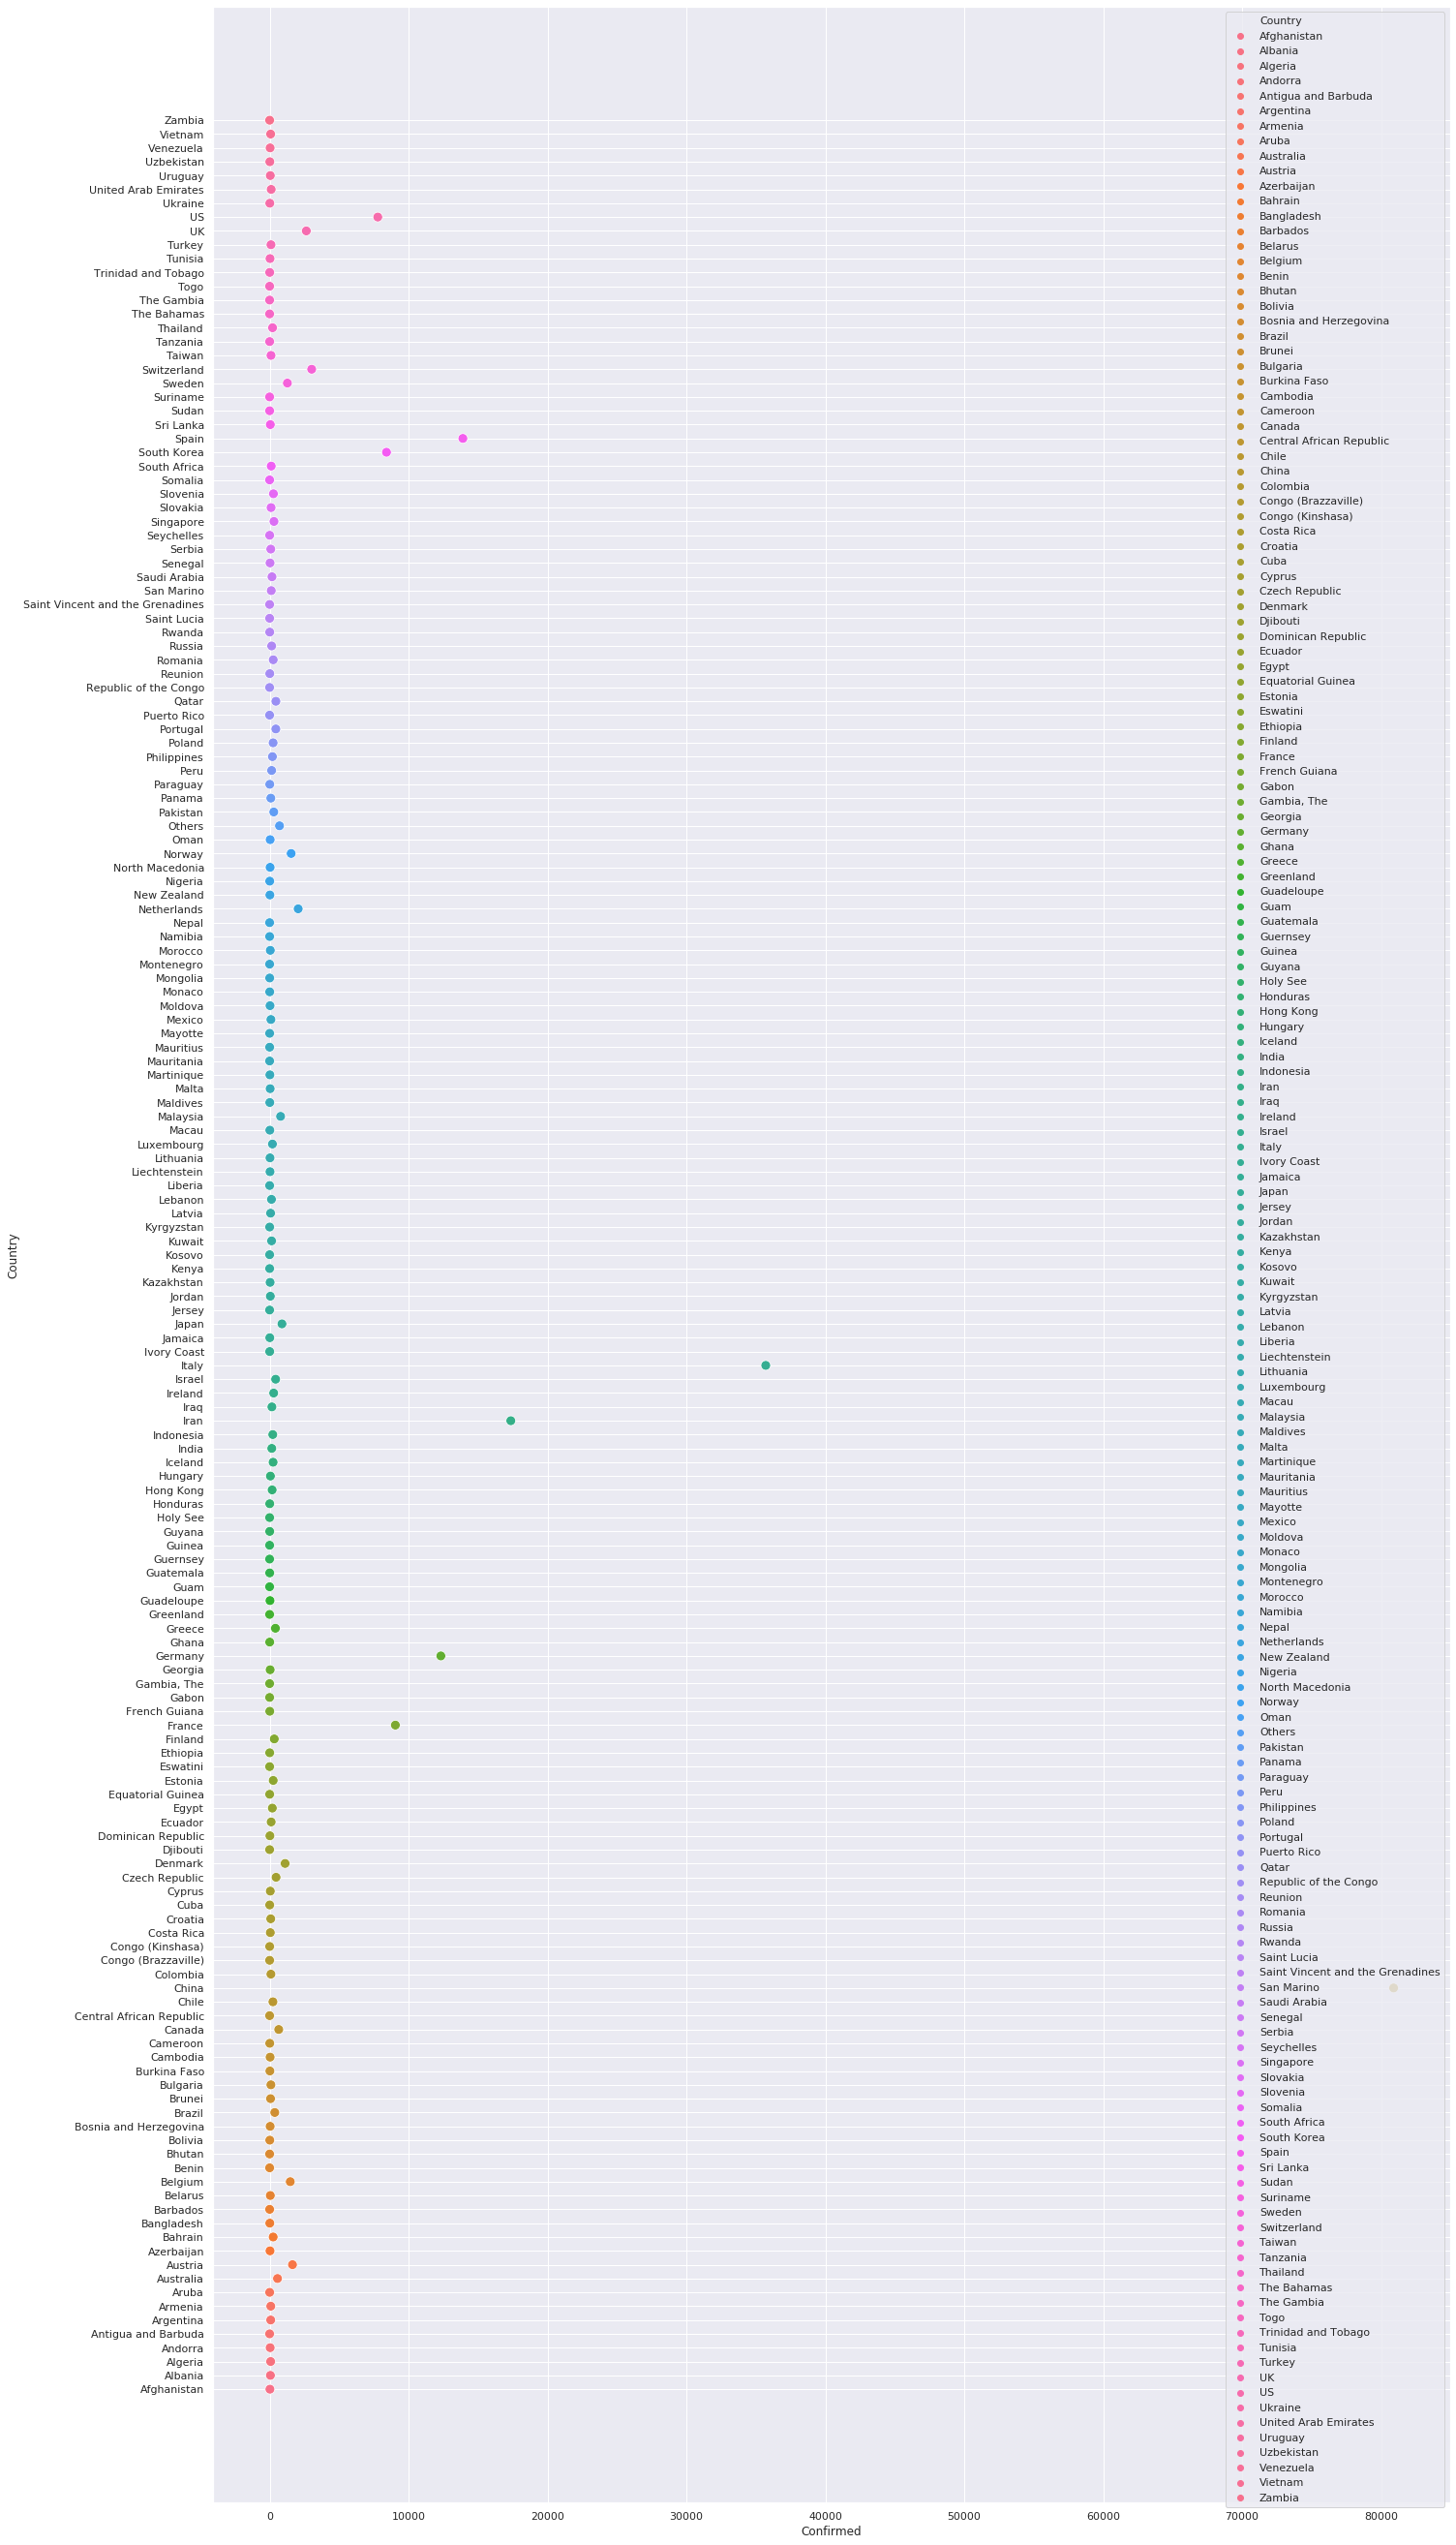

In [14]:
# Countries With confirmed cases > 300
plt.figure(figsize=(21, 41))
sns.scatterplot(y='Country',
                x='Confirmed',
                data=observational_data,
                s=100,
                hue="Country")
plt.xticks(rotation=0)
plt.tight_layout()

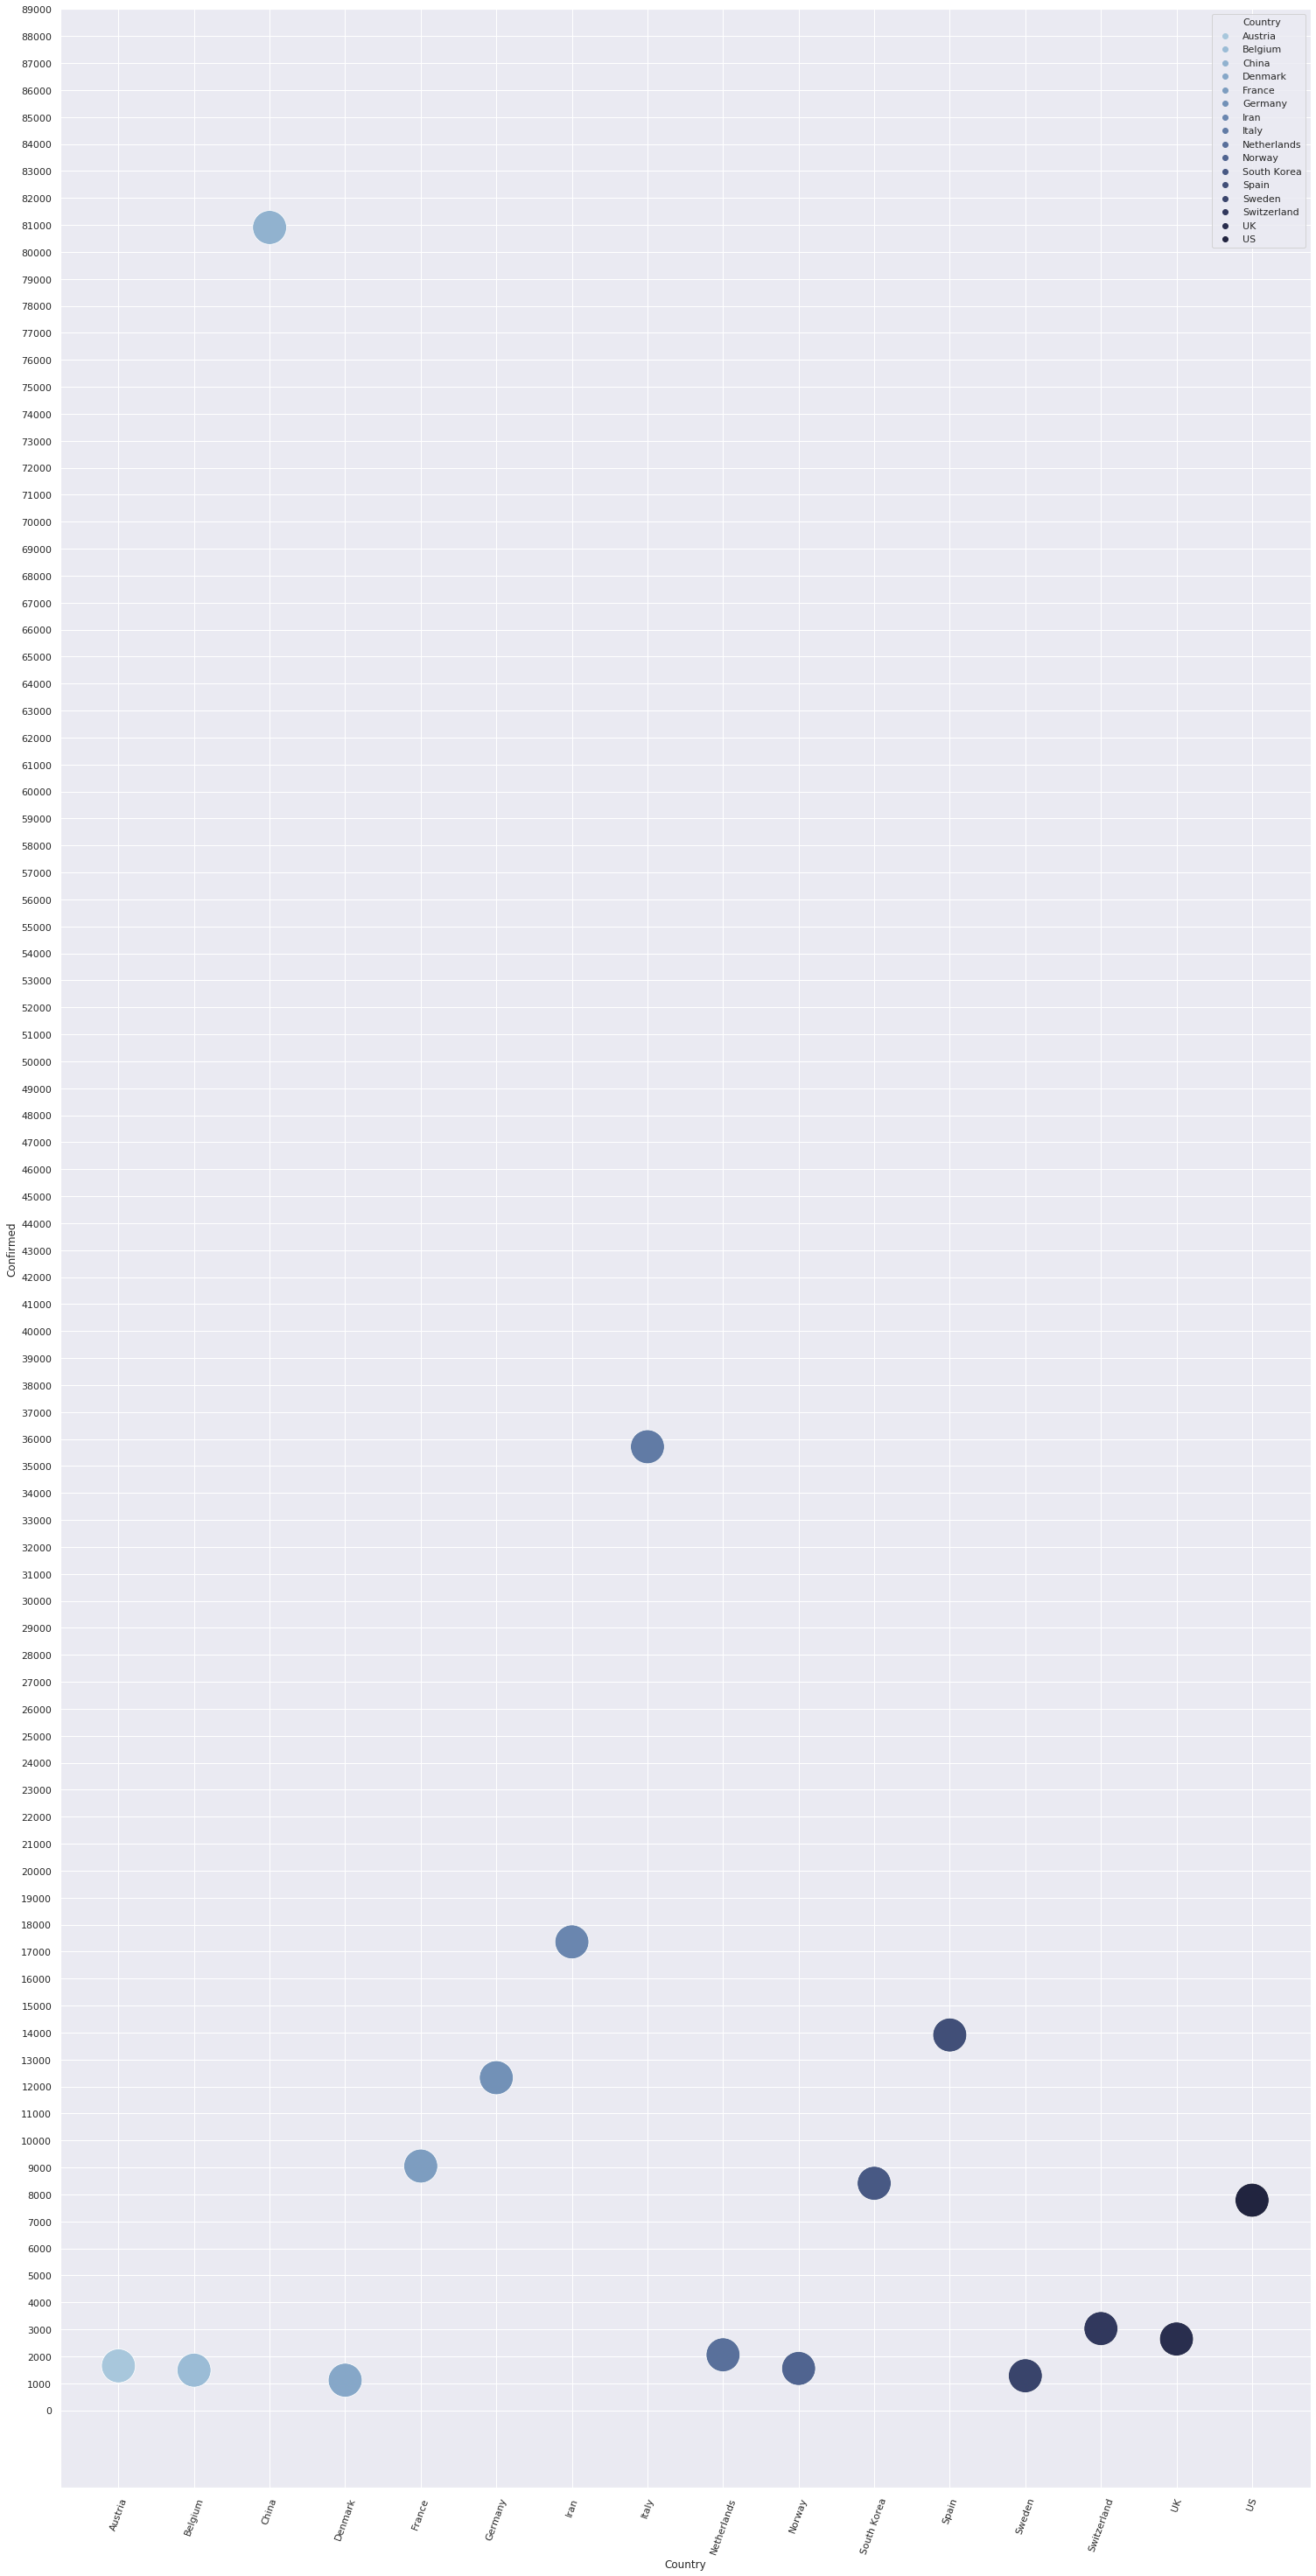

In [15]:
# Countries With confirmed cases > 1000
plt.figure(figsize=(21, 41))
sns.scatterplot(
    x='Country',
    y='Confirmed',
    data=observational_data[observational_data['Confirmed'] > 1000],
    s=1500,
    hue="Country",
    palette="ch:r=-.15,l=.75")
plt.xticks(rotation=70)
plt.yticks(ticks=[i for i in range(0,90000,1000)])
plt.tight_layout()

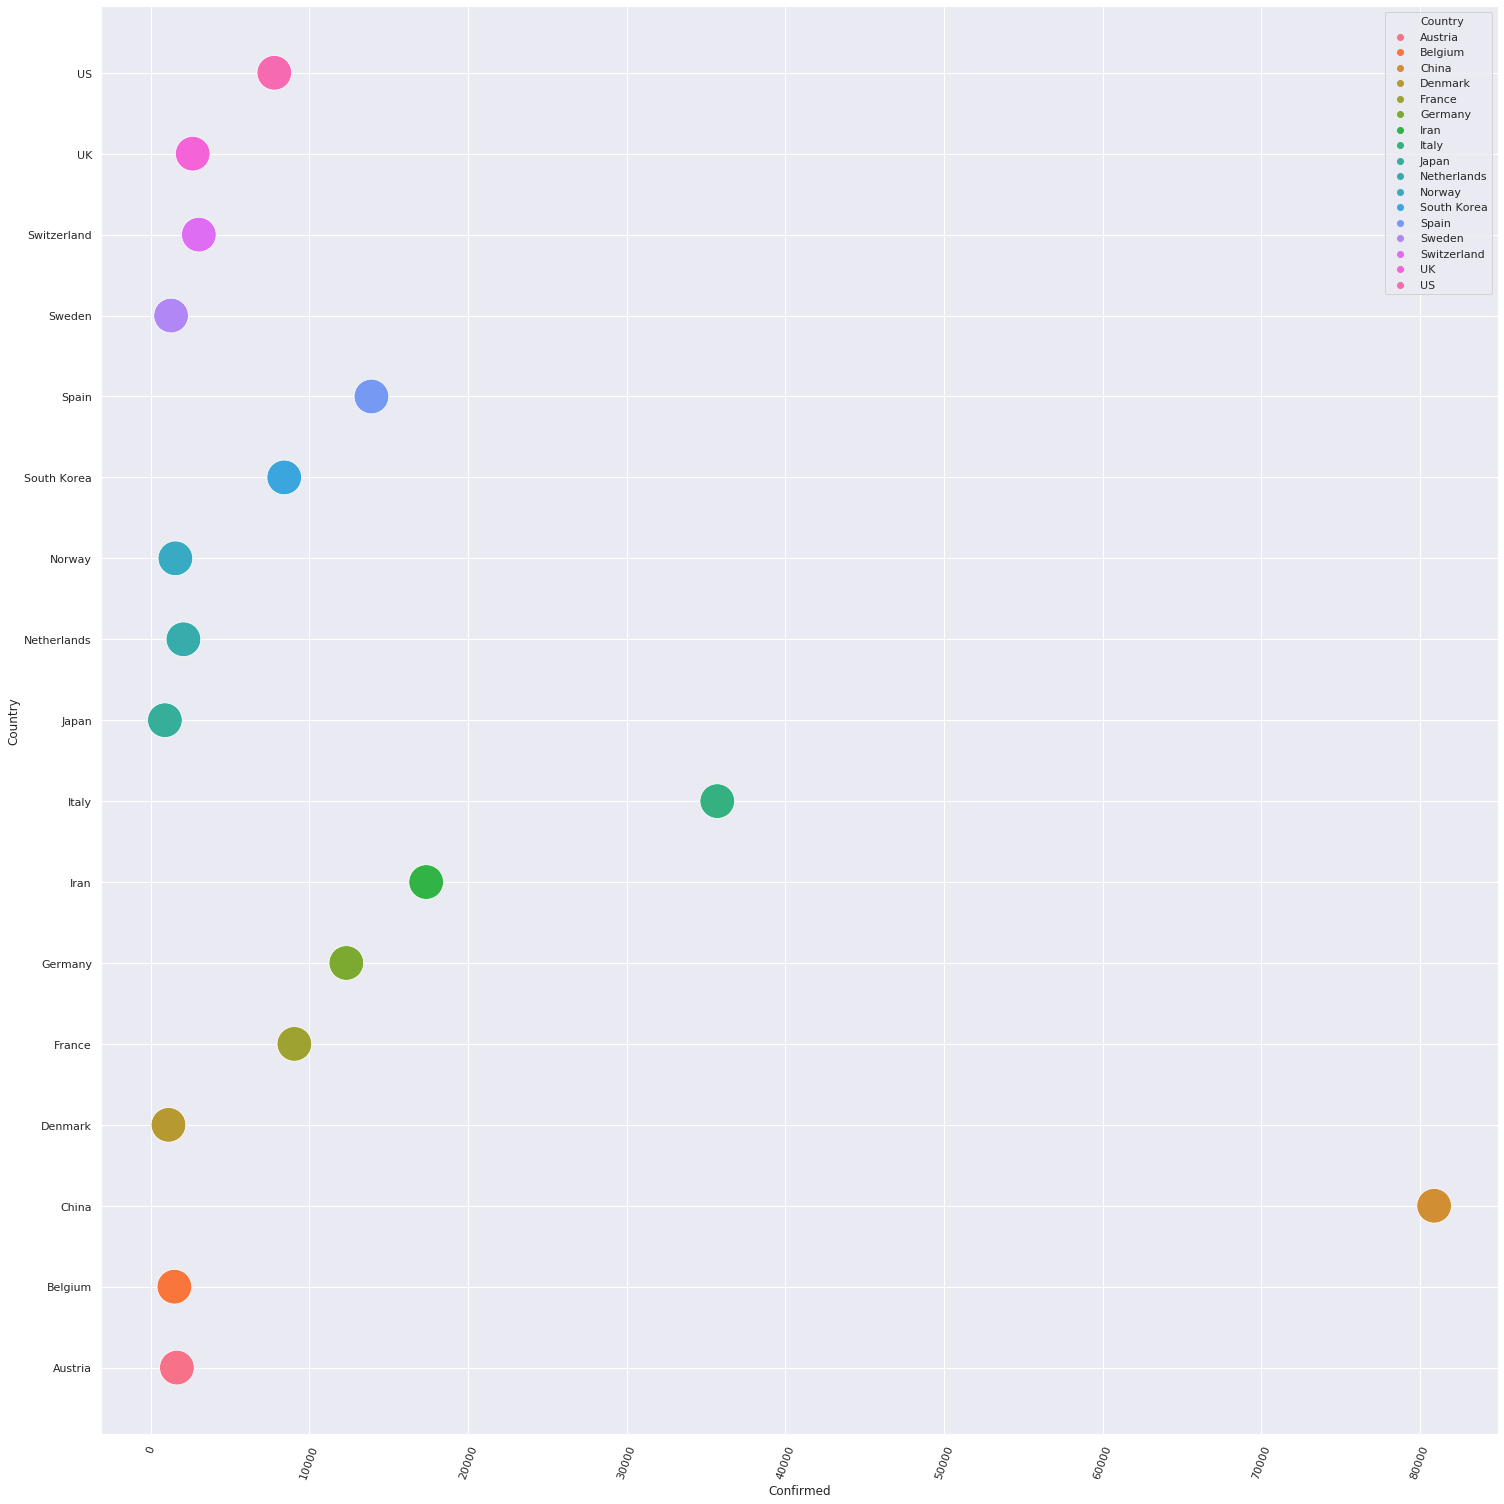

In [16]:
plt.figure(figsize=(21, 21))
sns.scatterplot(
    y='Country',
    x='Confirmed',
    data=observational_data[(observational_data['Confirmed'] >= 800)],
    s=1200,
    hue="Country")
plt.xticks(rotation=70)
plt.tight_layout()

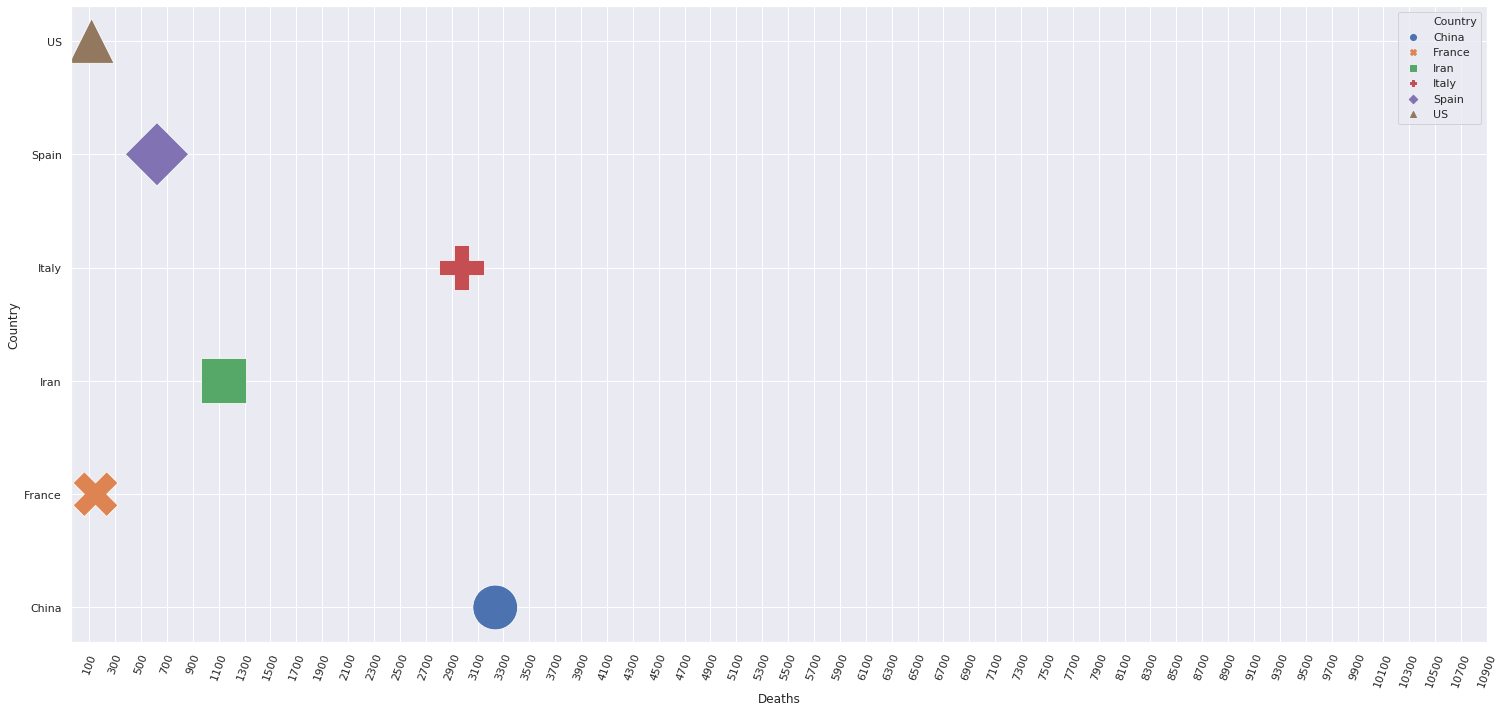

In [17]:
plt.figure(figsize=(21, 10))
sns.scatterplot(y='Country',
                x='Deaths',
                data=observational_data[(observational_data['Deaths'] >= 100)],
                s=2000,
                hue="Country",
                style="Country")
plt.xticks(ticks=[i for i in range(100, 11000, 200)], rotation=70)
plt.tight_layout()

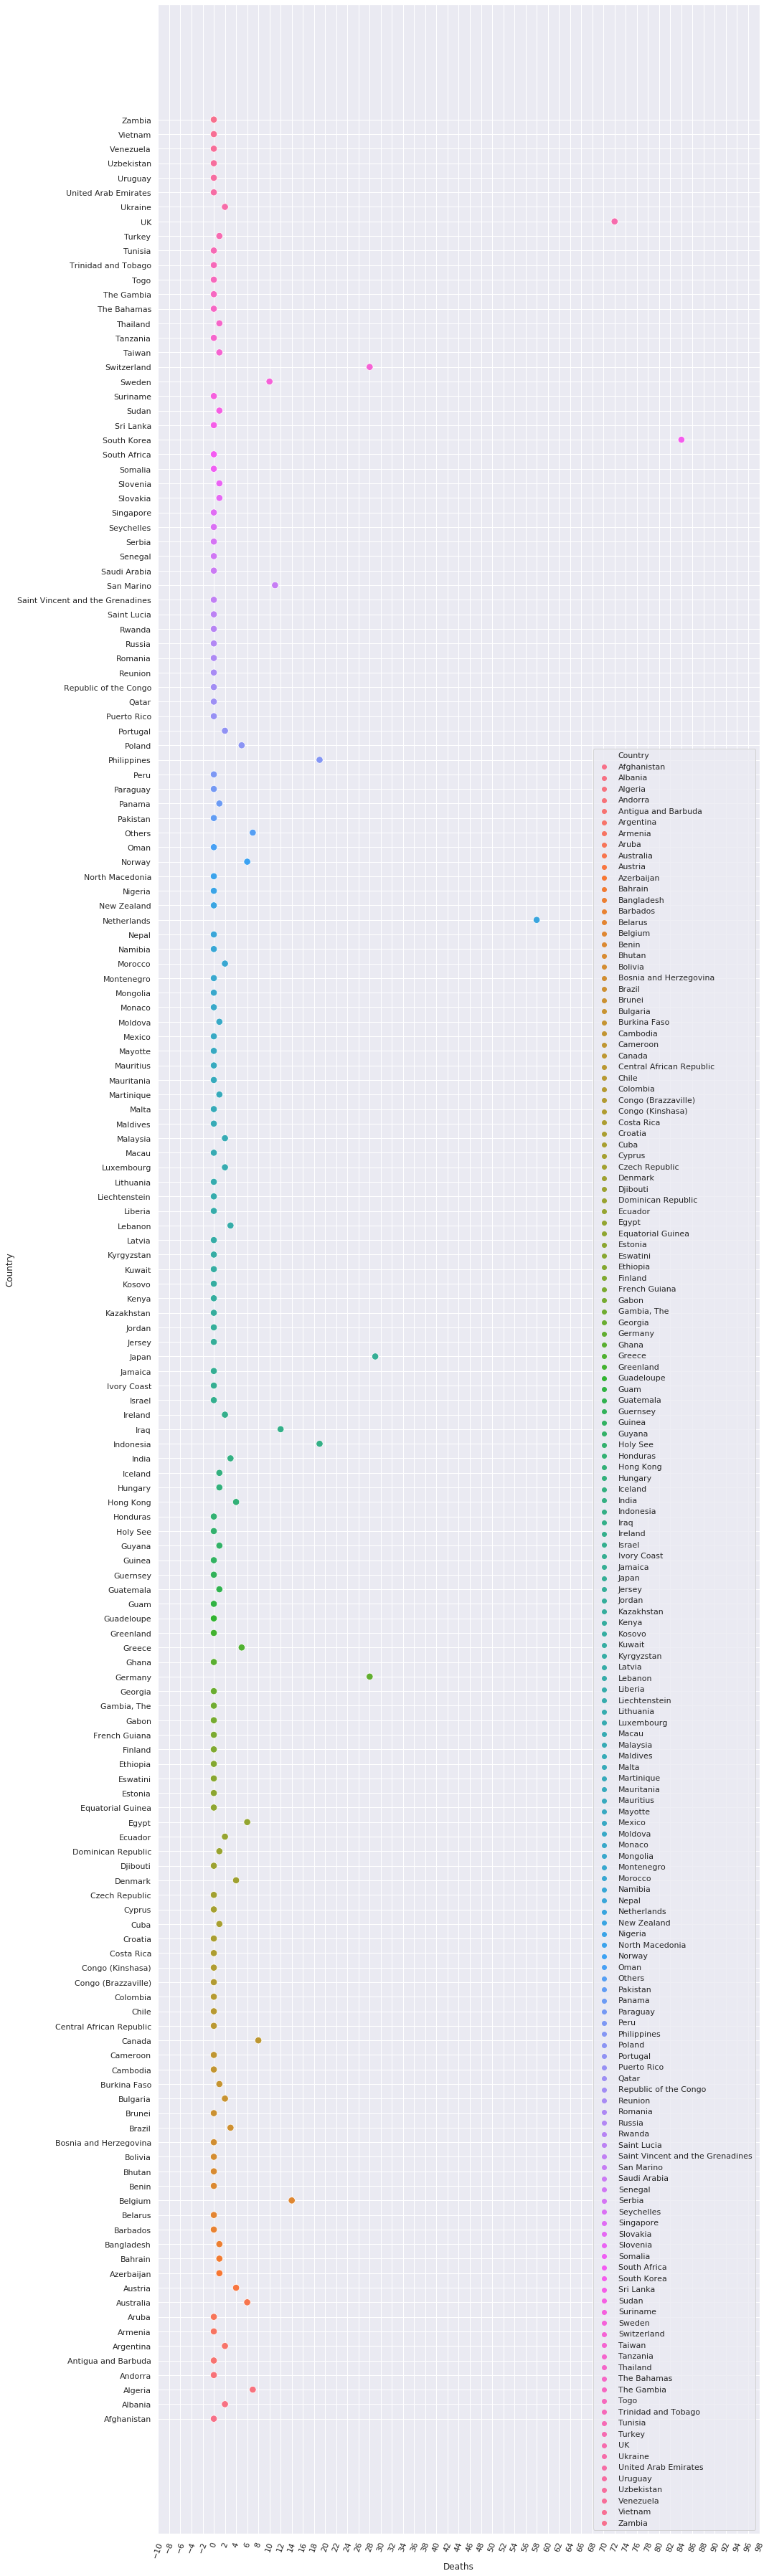

In [18]:
plt.figure(figsize=(15, 50))
sns.scatterplot(y='Country',
                x='Deaths',
                data=observational_data[(observational_data['Deaths'] <= 100)],
                s=90,
                hue="Country")
plt.xticks(ticks=[i for i in range(-10, 100, 2)], rotation=70)
plt.tight_layout()